## Práctica 2 - Optimización No Lineal

## Pablo Clemente Moreno <br> No. Cuenta: 418125805

In [1]:
import math
import sympy as sp

Calcule las derivadas con sympy y con una calculadora de derivadas online y a mano para verificar que estuvieran bien y simplificar un poco las expresiones.

In [2]:
x = sp.Symbol('x') # derivar respecto de x
y = (0.5/((1 + x**2)**(1/2)) - (((1 + x**2)**(1/2))*(1 - (0.5/(1 + x**2)))) + x)*-1 #funcion a derivar
deriv1 = sp.diff(y) #derivada primera
deriv2 = sp.diff(y,x,x) #derivada segunda

In [3]:
deriv1

1.0*x*(1 - 0.5/(x**2 + 1))*(x**2 + 1)**(-0.5) + 1.5*x*(x**2 + 1)**(-1.5) - 1

In [4]:
deriv2

-1.0*x**2*(1 - 0.5/(x**2 + 1))*(x**2 + 1)**(-1.5) - 3.5*x**2*(x**2 + 1)**(-2.5) + 1.0*(1 - 0.5/(x**2 + 1))*(x**2 + 1)**(-0.5) + 1.5*(x**2 + 1)**(-1.5)

## 1. Encontrar solución optima de la siguiente función: max $f(x)= \frac{0.5}{\sqrt{1 +x^2}} - \sqrt{1 +x^2}(1 - \frac{0.5}{1+x^2})+x$

In [5]:
num_eval_f=0
def f(x):
    global num_eval_f
    num_eval_f+=1
    try:
        return (0.5/((1 + x**2)**(1/2)) - (((1 + x**2)**(1/2))*(1 - (0.5/(1 + x**2)))) + x)*-1 #multiplicar por -1 para maximizar
    except ZeroDivisionError:
        return 0

## a. Utilizando el método de estimaciones cuadráticas sucesivas. 
La entrada a tu programa será: x0 = 0, ∆ = 0.1 y ε = 0.0001.<br>
Debes reportar el valor obtenido para x*, f(x*) y el número de evaluaciones de f(x) que realizó tu programa.

In [6]:
def estimaciones(x1,dx,eps):
    x2 = x1 + dx
    f1 = f(x1)
    f2 = f(x2)
    if f1 > f2:
        x3 = x1 + 2*dx
        f3 = f(x3)
    else:
        x3 = x2
        f3 = f2
        x2 = x1
        f2 = f1
        x1 = x1 - dx 
        f1 = f(x1)
    while True:
        #determinar fmin y xmin:
        lista = [[x1,f1],[x2,f2],[x3,f3]]
        aux = sorted(lista, key = lambda x: x[1]) 
        fmin = aux[0][1]
        xmin = aux[0][0]
        #calcular xb y fb
        a0 = f1
        a1 = (f2-f1)/(x2-x1)
        a2 = (1/(x3-x2))*(((f3-f1)/(x3-x1)) - a1) 
        xb = ((x1+x2)/2) - (a1/(2*a2))
        fb = f(xb)
        #almacenar mejores:
        lista.append([xb,fb])
        mejoresf = sorted(lista, key = lambda x: x[1])[:-1] #3 mejores puntos en base a f
        mejores = sorted(mejoresf) # 3 mejore puntos en base a x
        x1,x2,x3 = mejores[0][0],mejores[1][0],mejores[2][0] #los asignamos a x1,x2,x3
        f1,f2,f3 = mejores[0][1],mejores[1][1],mejores[2][1]
        if abs(xmin-xb) <= eps:
            print("(%.3f,%.3f)"%(xb,fb))
            print(num_eval_f)
            break

In [7]:
estimaciones(0,0.01,0.00001)

(0.786,-0.300)
13


## b. Utilizando el método de Newton - Raphson. 
La entrada a tu programa será: x0 = 0, ε = 0.0001<br>
Debes reportar el valor obtenido para x*, f(x*) y el número de evaluaciones de f'(x) que realizó tu programa.

In [8]:
num_eval = 0
def d1(x):
    global num_eval 
    num_eval +=1
    try:
        return ((x**2 + 1)**(3/2) -x**3 - 2*x)/((x**2 + 1)**(2/3))*-1
    except ZeroDivisionError:
        return 0

In [9]:
def d2(x):
    try:
        return (x**2 - 2)/((x**2 + 1 )**(5/2))*-1
    except ZeroDivisionError:
        return 0

In [10]:
def NewtonRaphson(x1,e):
    k = 1
    f1 = d1(x1)
    f2 = d2(x1)
    while abs(f1)>e:
        xk = x1 - f1/f2
        x1 = xk
        f1 = d1(x1)
        f2 = d2(x1)
        k+=1
    print("(%.3f,%.3f)"%(x1,f(x1)))
    return print(num_eval)

In [11]:
NewtonRaphson(0,0.0001)

(0.786,-0.300)
11


## c. Utilizando el método de Cuasi-Newton. 
La entrada a tu programa será: x0 = 0, ∆ = 0.01 y ε = 0.0001<br>
Debes reportar el valor obtenido para x*, f(x*) y el número de evaluaciones de f(x) que realizó tu programa.

In [12]:
eval_f =0
def f(x):
    global eval_f
    eval_f+=1
    try:
        return (0.5/((1 + x**2)**(1/2)) - (((1 + x**2)**(1/2))*(1 - (0.5/(1 + x**2)))) + x)*-1
    except ZeroDivisionError:
        return 0

In [13]:
def d1(x,y,w,dx):#derivada primera
    try:
        return (y - w)/ (2*dx)
    except ZeroDivisionError:
        return 0
def d2(x,y,w,dx): #derivada segunda
    try:
        return (y - 2*(f(x)) + w)/ (dx**2)
    except ZeroDivisionError:
        return 0

In [14]:
def CuasiNewton(x1,dx,e):
    k = 1
    y = f(x1+dx)
    w = f(x1-dx)
    f1 = d1(x1,y,w,dx)
    while abs(f1)>e:
        f2 = d2(x1,y,w,dx)
        xk = x1 - f1/f2
        x1 = xk
        y = f(x1+dx)
        w = f(x1-dx)
        f1 = d1(x1,y,w,dx)
        k+=1
    print("(%.3f,%.3f)"%(x1,f(x1)))
    print(eval_f)

In [15]:
CuasiNewton(0,0.01,0.0001)

(0.786,-0.300)
18


## d. Utilizando el método de Bisección. 
La entrada a tu programa será: a = 0, b = 5 y ε = 0.0001<br>
Debes reportar el valor obtenido para x*, f(x*) y el número de evaluaciones de f'(x) que realizó tu programa.

In [16]:
num_eval = 0
def d1(x):
    global num_eval 
    num_eval +=1
    try:
        return ((x**2 + 1)**(3/2) -x**3 - 2*x)/((x**2 + 1)**(2/3))*-1
    except ZeroDivisionError:
        return 0

In [17]:
def biseccion(a,b,e):
    da = d1(a)
    db = d1(b)
    if da <= 0 and db >= 0 :
        z = (a+b)/2
        dz = d1(z)
        while abs(dz) > e:
            if dz < 0:
                a = z
                z = (a+b)/2
                dz = d1(z)
            else:
                b = z
                z = (a+b)/2
                dz = d1(z)  
        print("(%.3f,%.3f)"%(z,f(z)))
        print(num_eval)
    else:
        print("Error")

In [18]:
biseccion(0,5,0.0001)

(0.786,-0.300)
12


## e. Utilizando el método de Secante. 
La entrada a tu programa será: a = 0, b = 5 y ε = 0.0001<br>
Debes reportar el valor obtenido para x*, f(x*) y el número de evaluaciones de f'(x) que realizó tu programa.

In [19]:
num_eval = 0
def d1(x):
    global num_eval 
    num_eval +=1
    try:
        return ((x**2 + 1)**(3/2) -x**3 - 2*x)/((x**2 + 1)**(2/3))*-1
    except ZeroDivisionError:
        return 0

In [20]:
def secante(xl,xr,e):
    dxl = d1(xl)
    dxr = d1(xr)
    if dxl*dxr < 0 :
        z = xr - (dxr*(xr-xl)/(dxr-dxl))
        dz = d1(z)
        while abs(dz) > e:
            if dz < 0:
                xl = z
                z = xr - (dxr*(xr-xl)/(dxr-dz))  
            else:
                xr = z  
                z = xr - (dz*(xr-xl)/(dz-dxl))  
            dz = d1(z) 
        print("(%.3f,%.3f)"%(z,f(z)))
        print(num_eval)
    else:
        print("Error")

In [21]:
secante(0,5,0.0001)

(0.786,-0.300)
20


Método | Punto optimo | f(x) / f'(x) | Evaluaciones
-- | -- | -- | --
Estimaciones cuadraticas sucesivas |0.786  | 0.300| 13
Newton-Raphson |0.786|0.300| __11__
Cuasi-Newton| 0.786|0.300| 18
Bisección |0.786|0.300| 12
Secante |0.786|0.300| 20

## 2. Gráficar f(x), en el intervalo [x* − 1, x* + 1].

In [22]:
def original(x):
    return 0.5/((1 + x**2)**(1/2)) - (((1 + x**2)**(1/2))*(1 - (0.5/(1 + x**2)))) + x

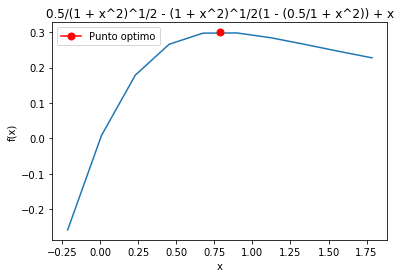

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.214, 1.786, num=10)
plt.plot(x, [original(i) for i in x])
plt.plot(0.786, 0.3000, marker='o', markersize=7, color="red", label='Punto optimo')
plt.title("0.5/(1 + x^2)^1/2 - (1 + x^2)^1/2(1 - (0.5/1 + x^2)) + x")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='best')
plt.show()

## 3. examen) Utiliza el método de tu preferencia para resolver el siguiente problema:
### $min g(x) = e^x − x^3$

In [24]:
def g(x):
    return math.exp(x) - x**3

In [25]:
num_eval = 0
def d1(x):
    global num_eval 
    num_eval +=1
    return math.exp(x) - 3*(x**2)

In [26]:
def d2(x):
    return math.exp(x) - 6*x

In [27]:
def NewtonRaphson(x1,e):
    k = 1
    f1 = d1(x1)
    f2 = d2(x1)
    while abs(f1)>e:
        xk = x1 - f1/f2
        x1 = xk
        f1 = d1(x1)
        f2 = d2(x1)
        k+=1
    print("(%.3f,%.3f)"%(x1,g(x1)))
    return print(num_eval)

Justificación: utilice el método de Newton-Raphson por que en las pruebas anteriores de esta práctica fue el que obtuvo una menor cantidad de evaluaciones de la función en comparacieon con los otros métodos y fue el que más me gusto al momento de implementarlo.

In [28]:
NewtonRaphson(0,0.0001)

(-0.459,0.729)
6


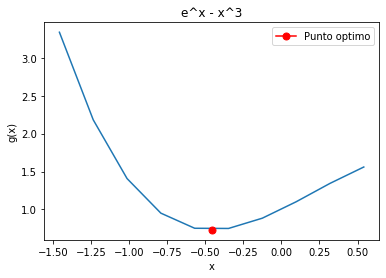

In [29]:
x = np.linspace(-1.459, 0.541, num=10)
plt.plot(x, [g(i) for i in x])
plt.plot(-0.459, 0.729, marker='o', markersize=7, color="red", label='Punto optimo')
plt.title("e^x - x^3")
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend(loc='best')
plt.show()